# Seattle Accident Severity    
### Data Science Capstone Project

## Introduction / Business Problem

Predictitions are a way of life in our busy schedules. We check the weather and it always seems to be a 50% chance of rain, especially in the Greater Seattle Washington area. There is even a section of the news that covers traffic. But it is limited to letting you know if a traffic accident has occured. What if we can predict accidents, in addiction the severity of these accidents. Better yet why not deploy measures to avoid or even reduce the number and severity of accidents.

This project will look at data provided by the Seattle Police Department and made available by the Seattle Department of Transportation. We will look at this data, and see if we can use it to predict the severity of accidents. Using the attributes in the data set we will examine different forms of data science tools to check if machine learning can aid in this question.

In the next section we look at the data and examine the attributes that will be the most useful.

## The Data Set

Let us import the library's to examine the data set.

In [1]:
import numpy as np
import pandas as pd

Now import the the data set into a data frame called df and look at the first 5 rows.

In [2]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv", header = 0, low_memory = False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


The next lines of code will execute the a statistical analysis of the columns, the number of rows and columns, and finally the type of data in the columns.

In [3]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [4]:
df.shape

(194673, 38)

In [5]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

There are 194673 rows of records, and 37 columns of attributes and 1 column with the output we are looking for. There are some columns that are not going to be useful.

We should check for missing values to determine the useful attributes.

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
df.isnull().sum().to_frame()

,0
SEVERITYCODE,0
X,5334
Y,5334
OBJECTID,0
INCKEY,0
COLDETKEY,0
REPORTNO,0
STATUS,0
ADDRTYPE,1926
INTKEY,129603


It's not easy to see the ones that should be dropped, let's try a bar graph

,Total,Percentage
SEVERITYCODE,0,0.0
SEGLANEKEY,0,0.0
SDOT_COLDESC,0,0.0
SDOT_COLCODE,0,0.0
INCDTTM,0,0.0
INCDATE,0,0.0
VEHCOUNT,0,0.0
CROSSWALKKEY,0,0.0
PEDCOUNT,0,0.0
PERSONCOUNT,0,0.0


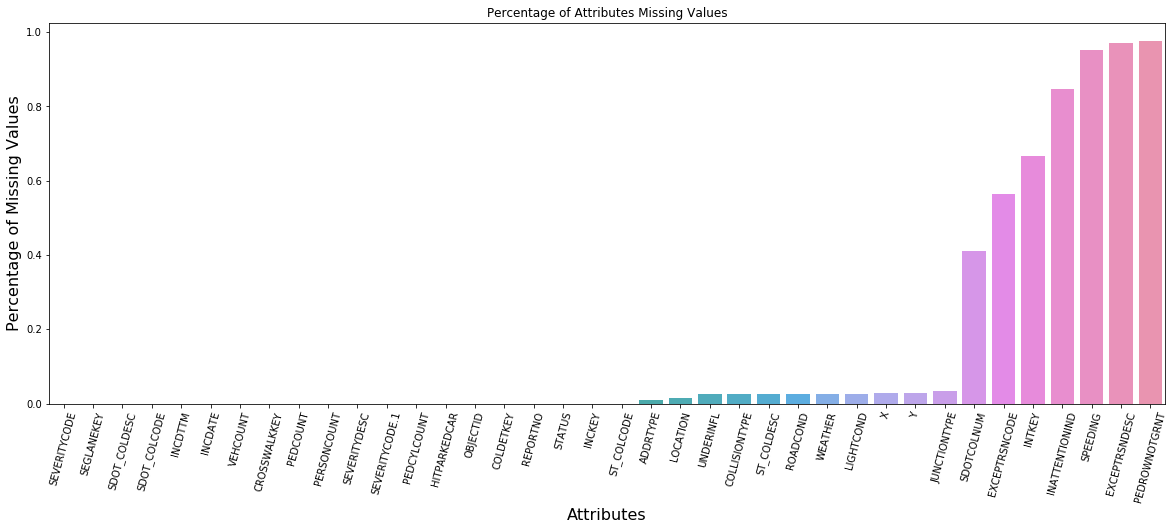

In [8]:
total = df.isnull().sum().sort_values()
percentage = (df.isnull().sum() / df.isnull().count()).sort_values()
missing_data = pd.concat([total, percentage], axis = 1, keys = ['Total', 'Percentage'])
f, ax = plt.subplots(figsize = (20, 7))
sns.barplot(x = missing_data.index, y = missing_data['Percentage'])
plt.xticks(rotation = '75')
plt.xlabel('Attributes', fontsize = 16)
plt.ylabel('Percentage of Missing Values', fontsize = 16)
plt.title('Percentage of Attributes Missing Values')
missing_data.head(10)

Much better looks like we can drop attributes that are over well over 5%.

In [9]:
df.drop(['SDOTCOLNUM', 'EXCEPTRSNCODE', 'INTKEY', 'INATTENTIONIND', 'SPEEDING', 'PEDROWNOTGRNT'], axis = 1, inplace = True)

In [10]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,...,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,5TH AVE NE AND NE 103RD ST,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,10,Entering at angle,0,0,N


There are redundant location columns that can be removed because the x, y columns are the longitude and latitude respectively and provide this information. Also there are code values and values that are not useful so we will elimate these as well as dates.

In [11]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'LOCATION', 'EXCEPTRSNDESC', 'SEVERITYCODE.1',
       'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'],
      dtype='object')

In [12]:
df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC', 'PEDCOUNT', 'PEDCYLCOUNT', 'INCDATE', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'EXCEPTRSNDESC', 'SDOT_COLDESC', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY'], axis = 1, inplace = True)

In [13]:
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,Angles,2,2,3/27/2013 2:54:00 PM,N,Overcast,Wet,Daylight,N
1,1,-122.347294,47.647172,Block,Sideswipe,2,2,12/20/2006 6:55:00 PM,0,Raining,Wet,Dark - Street Lights On,N
2,1,-122.334540,47.607871,Block,Parked Car,4,3,11/18/2004 10:20:00 AM,0,Overcast,Dry,Daylight,N
3,1,-122.334803,47.604803,Block,Other,3,3,3/29/2013 9:26:00 AM,N,Clear,Dry,Daylight,N
4,2,-122.306426,47.545739,Intersection,Angles,2,2,1/28/2004 8:04:00 AM,0,Raining,Wet,Daylight,N


Now let's view what attributes we have left

In [14]:
df.isnull().sum()

SEVERITYCODE        0
X                5334
Y                5334
ADDRTYPE         1926
COLLISIONTYPE    4904
PERSONCOUNT         0
VEHCOUNT            0
INCDTTM             0
UNDERINFL        4884
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
HITPARKEDCAR        0
dtype: int64

The longitude (x) and latitude (y) have the largest count of missing values but are needed for location information. The data missing is less than 3%, so I'm okay with dropping the values in these attibutes

In [15]:
df.dropna(subset = ["X", "Y"], axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)
df.isnull().sum()

SEVERITYCODE        0
X                   0
Y                   0
ADDRTYPE            0
COLLISIONTYPE    4757
PERSONCOUNT         0
VEHCOUNT            0
INCDTTM             0
UNDERINFL        4737
WEATHER          4925
ROADCOND         4858
LIGHTCOND        5012
HITPARKEDCAR        0
dtype: int64

Next is lighting conditions, let us evaluate if there is high frequecy over other values to replace the missing ones with

In [16]:
df['LIGHTCOND'].value_counts()

Daylight                    113582
Dark - Street Lights On      47314
Unknown                      12432
Dusk                          5775
Dawn                          2422
Dark - No Street Lights       1451
Dark - Street Lights Off      1152
Other                          188
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [18]:
df['LIGHTCOND'].isnull().sum()

5012

We can easily replace the missing data with Daylight as it dominates in the data set

In [19]:
df['LIGHTCOND'].replace(np.nan, "Daylight", inplace = True)

Next we should look at Weather and Road Conditions because these are useful attributes like Lighting Conditions

In [21]:
df['WEATHER'].value_counts()

Clear                       108959
Raining                      32015
Overcast                     27136
Unknown                      13893
Snowing                        894
Other                          773
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               50
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [23]:
df['WEATHER'].isnull().sum()

4925

In [24]:
df['WEATHER'].replace(np.nan, "Clear", inplace = True)

In [25]:
df['ROADCOND'].value_counts()

Dry               122076
Wet                46064
Unknown            13839
Ice                 1177
Snow/Slush           989
Other                117
Standing Water       102
Sand/Mud/Dirt         64
Oil                   53
Name: ROADCOND, dtype: int64

In [26]:
df['ROADCOND'].isnull().sum()

4858

In [28]:
df['ROADCOND'].replace(np.nan, "Dry", inplace = True)

In [29]:
df.isnull().sum()

SEVERITYCODE        0
X                   0
Y                   0
ADDRTYPE            0
COLLISIONTYPE    4757
PERSONCOUNT         0
VEHCOUNT            0
INCDTTM             0
UNDERINFL        4737
WEATHER             0
ROADCOND            0
LIGHTCOND           0
HITPARKEDCAR        0
dtype: int64

Finally we look at the last two attributes

In [30]:
df['COLLISIONTYPE'].value_counts()

Parked Car    46381
Angles        34460
Rear Ended    32968
Other         22277
Sideswipe     18034
Left Turn     13624
Pedestrian     6551
Cycles         5378
Right Turn     2912
Head On        1997
Name: COLLISIONTYPE, dtype: int64

In [31]:
df['UNDERINFL'].value_counts()

N    97639
0    78082
Y     5002
1     3879
Name: UNDERINFL, dtype: int64

These values are very specific to an occurance in the data, and no dominating value, so we will zero these out like the X and Y values

In [32]:
df.dropna(subset = ["COLLISIONTYPE", "UNDERINFL"], axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)
df.isnull().sum()

SEVERITYCODE     0
X                0
Y                0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
VEHCOUNT         0
INCDTTM          0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
HITPARKEDCAR     0
dtype: int64

This will be the Data we will work with to complete the Project and answer the question presented at the beginning of the notebook.